# Problema 1

In [7]:
from random import sample
from math import comb

#  P(B|A) se citește ca "probabilitatea lui B condiționată de A"
#  probabilitatea ca evenimentul B să aibă loc, știind că evenimentul A a avut deja loc

In [8]:
def prob_cond(nr_sim):
    countA, countAB = 0, 0
    for _ in range(nr_sim):
        bile_extrase = sample(['red','blue','green'],counts=[5,3,2],k=3)
        if 'red' in bile_extrase:
            countA+=1
            if len(set(bile_extrase))==1:
                countAB+=1
    return countAB/countA

In [9]:
prob_cond(5000)

0.09049479166666667

In [4]:
prob_teoretica_AB = comb(5,3)/comb(10,3)
prob_teoretica_A = 1 - comb(5,3)/comb(10,3)
prob_B_cond_A_teoretica=prob_teoretica_AB/prob_teoretica_A
prob_B_cond_A_teoretica

0.09090909090909091

# Problema 2

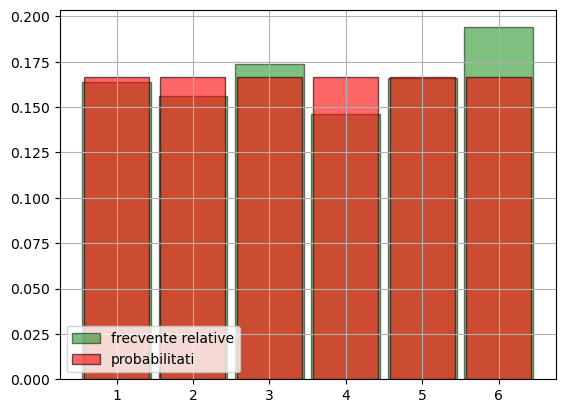

In [4]:
from random import randrange
from matplotlib.pyplot import bar, show, hist, grid, legend

data = [randrange(1,7) for _ in range(500)]
bin_edges = [i+0.5 for i in range(7)]                                     
 #  Pentru histograme, bin_edges definește marginile intervalelor (barelor). 
 #  Aici, marginile sunt ușor deplasate pentru a centra barele pe valorile 1, 2, ..., 6, deoarece fiecare valoare are o limită de +/- 0.5.

hist(data, bin_edges, density = True, rwidth=0.9, color ='green',   
     edgecolor='black', alpha = 0.5, label='frecvente relative')        
 #  density=True normalizază histograma pentru a reprezenta frecvențe relative.
 #  alpha=0.5 ajustează transparența barelor.
 #  rwidth=0.9 reglează lățimea barelor, lăsând spații mici între ele.

distribution = dict([(k,1/6) for k in range(1,7)])
 #  dictionarul (distribution) definește probabilitatea teoretică uniformă pentru fiecare valoare posibilă a aruncării unui zar (1/6).

bar(distribution.keys(),distribution.values(), width=0.85,color='red',
        edgecolor='black',alpha=0.6, label='probabilitati')
 #  distribution.keys() reprezintă valorile 1, 2, ..., 6.
 #  distribution.values() reprezintă probabilitățile asociate, adică 1/6 pentru fiecare valoare.

legend(loc='lower left')
grid()
show()

# Problema 3

In [2]:
from scipy.stats import binom
#help('scipy.stats.binom')

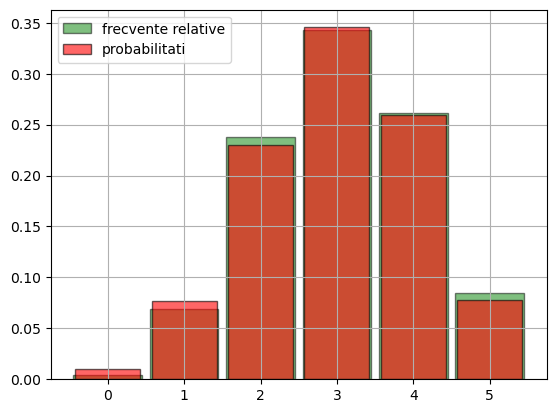

P(2<X<=5) estimata este  0.689
P(2<X<=5) teoretica este  0.68256


In [14]:
nr_sim=1000
n, p = 5, 0.6       #  p = 0.6 este probabilitatea de succes la fiecare încercare.    
                    #  de ce cazuri favorabile = 6 / cazuri posibile = 10 == 0.6
x = binom.rvs(n,p,size=nr_sim)

 #  binom.rvs este utilizată pentru a genera valori aleatoare dintr-o distribuție binomială. 
 #  în acest context, binom.rvs simulează rezultatele a 1000 de experimente binomiale, fiecare constând în 5 încercări independente, 
 #  în care probabilitatea de succes la fiecare încercare este p = 0.6 .

bin_edges = [i+0.5 for i in range(-1,6)]
hist(x, bin_edges, density = True, rwidth=0.9, align = 'mid', color ='green',
     edgecolor='black', alpha = 0.5, label='frecvente relative')                     

distribution = dict([(k,binom.pmf(k,n,p)) for k in range(6)])

 #  binom.pmf calculează probabilitatea teoretică de a obține exact k succese 
 #  în n încercări independente, unde probabilitatea de succes la fiecare încercare este p = 0.6

bar(distribution.keys(),distribution.values(), width=0.85, align='center',
    color='red',edgecolor='black',alpha=0.6, label='probabilitati')

legend(loc='upper left')
grid()
show()

print('P(2<X<=5) estimata este ', sum([(2<k)&(k<=5) for k in x])/nr_sim)   # probabilitatea ca o variabila aleatoare X sa aibă valori între 2 și 5
print('P(2<X<=5) teoretica este ', binom.cdf(5,n,p)-binom.cdf(2,n,p))

 #  binom.cdf este folosită pentru a calcula probabilitatea cumulativă a distribuției binomiale. 
 #  CDF (cumulative distribution function) returnează probabilitatea ca o variabilă aleatoare binomială X 
 #  să ia o valoare mai mică sau egală cu un anumit număr k adică P(X <= 𝑘)

# Problema 4

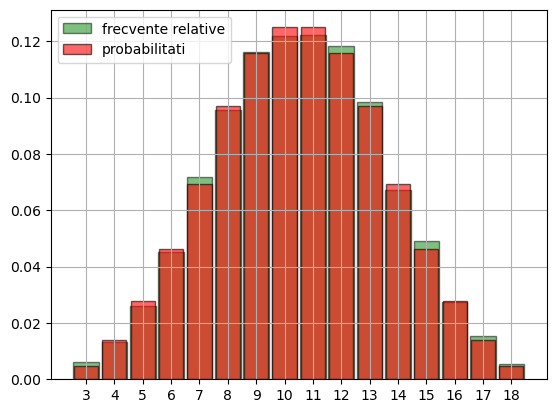

In [5]:
from matplotlib.pyplot import xticks, legend
from itertools import product

nr_sim = 10000    
 #  se vor face 10000 de simulari pentru a calcula frecvențele relative ale sumelor obținute la trei zaruri.

sume_sim = [randrange(1,7)+randrange(1,7)+randrange(1,7) for _ in range(nr_sim)]    
 #  fiecare simulare presupune aruncarea a trei zaruri și calcularea sumei acestora.

bin_edges = [i+0.5 for i in range(2,19)]       
 #  bin_edges definește marginile barelor pentru sume între 3 și 18.   
 #  density=True normalizează histograma, astfel încât aceasta să arate frecvențele relative

hist(sume_sim, bin_edges, density = True, rwidth=0.9, color ='green', 
     edgecolor='black', alpha = 0.5, label='frecvente relative')

distribution = dict([(i,0) for i in range(3,19)])     
 #  se creează un dicționar "distribution" pentru toate sumele posibile, inițializat cu 0.

for z in product(range(1,7),repeat=3):    #  generează toate combinațiile posibile ale celor trei zaruri.
    distribution[sum(z)] += 1/6**3        #  1/6 * 1/6 * 1/6
    
 #  calculează suma fiecărei combinații, iar probabilitatea fiecărei sume se adaugă la dicționar (fiecare combinație are o probabilitate de 1/6**3
 #  inițial, distribution este un dicționar gol sau unul în care fiecare cheie (de la 3 la 18) este setată la 0.
 #  pe măsură ce se parcurg toate combinațiile de zaruri, fiecare sumă calculată (sum(z)) își adaugă probabilitatea în dicționar. 
 #  astfel, distribution[9] va crește de fiecare dată când o combinație a zarurilor are suma 9. 
 #  la final, distribution[9] va conține probabilitatea totală ca suma celor trei zaruri să fie 9.


bar(distribution.keys(),distribution.values(), width=0.85, color='red', 
    edgecolor='black', alpha=0.6, label='probabilitati')

legend(loc='upper left')
xticks(range(3,19))
grid()
show()